In [1]:
import numpy as np, curvedsky, prjlib, plottools as pl, tools_y, binning as bn, tools_qrec, pickle, analysis as ana
from matplotlib.pyplot import *

In [2]:
def plots(mb,fltr='cinv',ytype='nilc',mtype=0,dtype='dr2_smica',cmask='Lmask',form='{:.2f}'):
    s = mb.bc**2/2/np.pi
    p = prjlib.init_analysis(dtype=dtype,fltr=fltr,wtype=cmask)
    qtau, qlen, qsrc, qtbh, qtBH = tools_qrec.init_quad(p.ids,p.stag,rlmin=100,rlmax=2048)
    cy = tools_y.init_compy(p.ids,masktype=mtype,ytype=ytype,ascale=1.0)
    fxtau = tools_y.init_cross(qtau,cy,p.ids,p.stag)
    fxtbh = tools_y.init_cross(qtbh,cy,p.ids,'bh_'+p.stag)
    fxtBH = tools_y.init_cross(qtBH,cy,p.ids,'BH_'+p.stag)
    pl.plot_1dstyle(fsize=[10,3],ymin=-1e-8,ymax=1e-8,ylab=r'$L^2C_L^{\tau y}/2\pi$')
    for xobj, Lab in [(fxtau,'normal'),(fxtbh,'bh'),(fxtBH,'BH')]:
        mcb, vcb, scb, ocb = bn.binned_spec(mb,xobj.xl,cn=1)
        errorbar(mb.bc,s*ocb,yerr=s*vcb,fmt='o',label=Lab)
    axhline(0.,color='k',ls='--')
    st = ana.PTEs(ocb,scb,comment=ytype+','+str(mtype),x1pte=True)
    figtext(.2,.20,'ymap:'+ytype+','+str(mtype))
    figtext(.2,.25,'tau:'+dtype+','+str(cmask))
    figtext(.2,.30,r'$\chi$-PTE:'+str(form.format(st.px1)))
    figtext(.2,.35,r'$\chi^2$-PTE:'+str(form.format(st.px2)))
    legend()
    show()

In [3]:
mb = bn.multipole_binning(10,lmin=1,lmax=2048)

chi: -1.3 , chi (sim): 0.0 , PTE: 0.64 (nilc,0)
chi^2: 14.8 , chi^2 (sim): 11.1 , PTE: 0.20 (nilc,0)


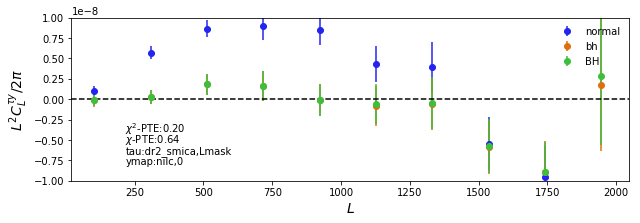

chi: 0.4 , chi (sim): -0.0 , PTE: 0.80 (nilc,0)
chi^2: 11.4 , chi^2 (sim): 11.2 , PTE: 0.37 (nilc,0)


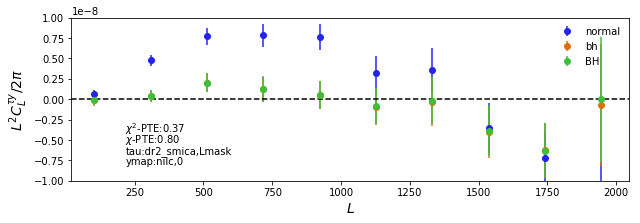

chi: -3.1 , chi (sim): 0.0 , PTE: 0.32 (milca,0)
chi^2: 14.1 , chi^2 (sim): 11.2 , PTE: 0.30 (milca,0)


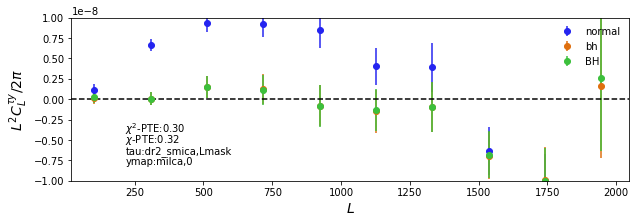

chi: -3.0 , chi (sim): -0.0 , PTE: 0.40 (nilc,1)
chi^2: 6.1 , chi^2 (sim): 11.1 , PTE: 0.83 (nilc,1)


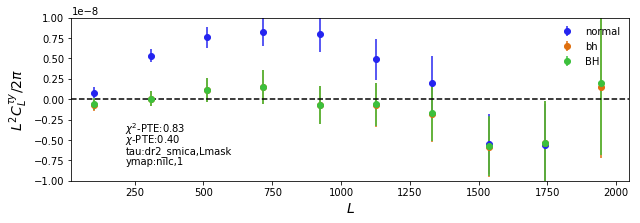

chi: 1.3 , chi (sim): -0.0 , PTE: 0.72 (nilc,0)
chi^2: 9.5 , chi^2 (sim): 11.2 , PTE: 0.51 (nilc,0)


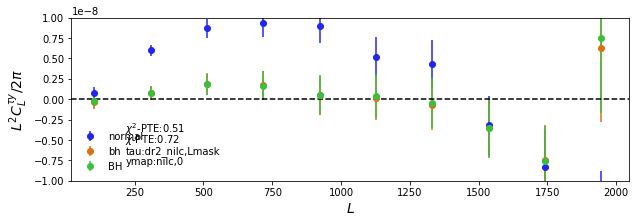

chi: -0.4 , chi (sim): 0.0 , PTE: 1.00 (nilc,0)
chi^2: 10.6 , chi^2 (sim): 11.1 , PTE: 0.47 (nilc,0)


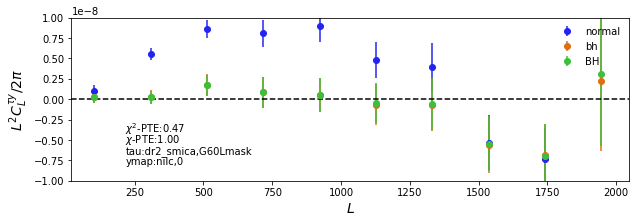

chi: 3.2 , chi (sim): -0.0 , PTE: 0.24 (nilc,0)
chi^2: 15.5 , chi^2 (sim): 11.1 , PTE: 0.20 (nilc,0)


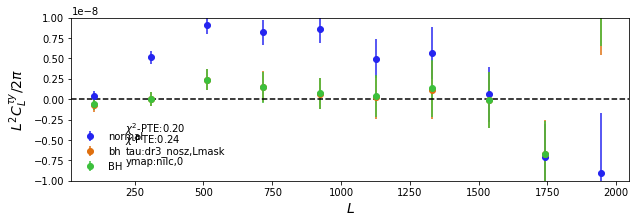

In [4]:
plots(mb)
plots(mb,fltr='none')
plots(mb,ytype='milca')
plots(mb,mtype=1)
plots(mb,dtype='dr2_nilc')
plots(mb,cmask='G60Lmask')
plots(mb,dtype='dr3_nosz',fltr='none')

chi: 3.0 , chi (sim): -0.0 , PTE: 0.36 (nilc,0)
chi^2: 11.7 , chi^2 (sim): 11.1 , PTE: 0.35 (nilc,0)


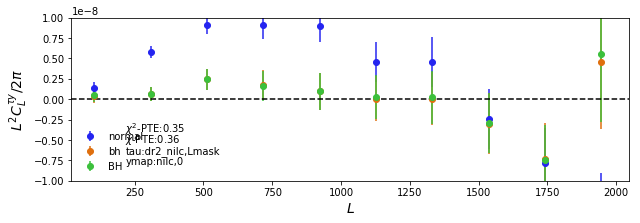

chi: 1.2 , chi (sim): 0.0 , PTE: 0.76 (nilc,1)
chi^2: 4.1 , chi^2 (sim): 11.1 , PTE: 0.99 (nilc,1)


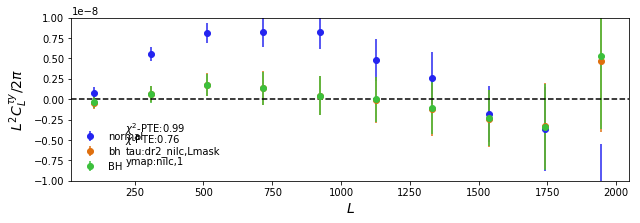

chi: 1.9 , chi (sim): -0.0 , PTE: 0.58 (milca,0)
chi^2: 13.6 , chi^2 (sim): 11.1 , PTE: 0.26 (milca,0)


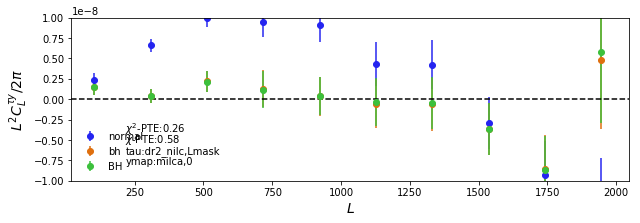

chi: 0.1 , chi (sim): -0.0 , PTE: 0.96 (milca,1)
chi^2: 5.1 , chi^2 (sim): 11.2 , PTE: 0.88 (milca,1)


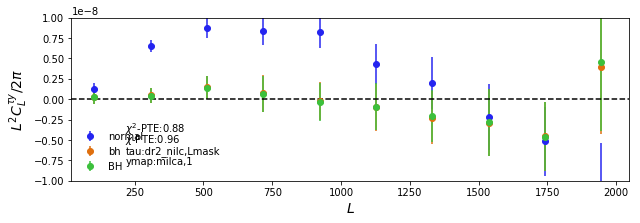

chi: 1.3 , chi (sim): -0.0 , PTE: 0.72 (nilc,0)
chi^2: 9.5 , chi^2 (sim): 11.2 , PTE: 0.51 (nilc,0)


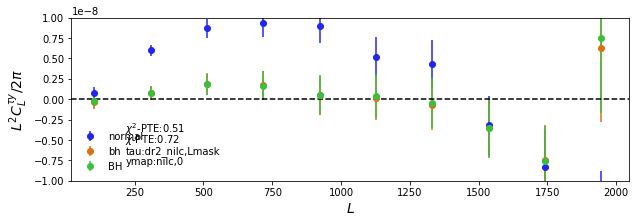

chi: -0.1 , chi (sim): 0.0 , PTE: 1.00 (nilc,1)
chi^2: 4.4 , chi^2 (sim): 11.1 , PTE: 0.97 (nilc,1)


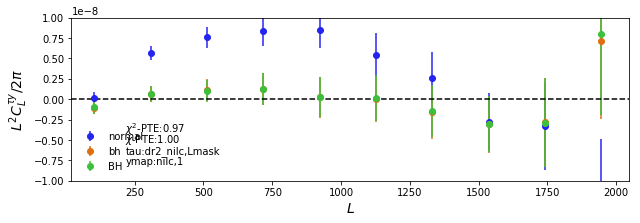

chi: 0.7 , chi (sim): -0.0 , PTE: 0.84 (milca,0)
chi^2: 9.8 , chi^2 (sim): 11.2 , PTE: 0.49 (milca,0)


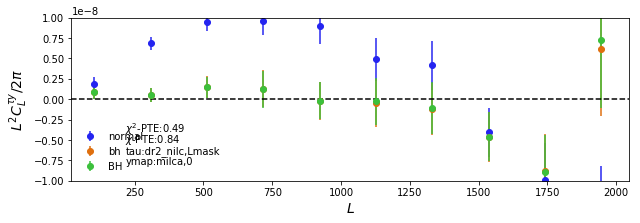

chi: -1.2 , chi (sim): -0.0 , PTE: 0.76 (milca,1)
chi^2: 6.2 , chi^2 (sim): 11.2 , PTE: 0.80 (milca,1)


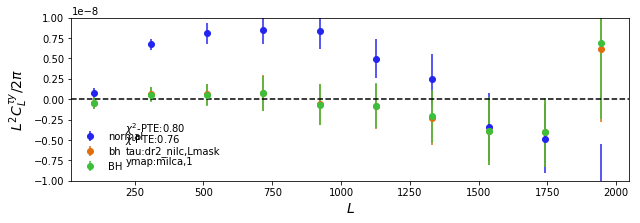

In [5]:
for fltr in ['none','cinv']:
#for fltr in ['none']:
    for dtype in ['dr2_nilc']:
        for cmask in ['Lmask']:
            for ytype in ['nilc','milca']:
                for mtype in [0,1]:
                    plots(mb,fltr,ytype,mtype,dtype,cmask)

In [10]:
def errors(fltr,ytype,mtype,mb,dtype,cmask):
    p = prjlib.init_analysis(dtype=dtype,fltr=fltr,wtype=cmask)
    qtau, qlen, qsrc, qtbh, qtBH = tools_qrec.init_quad(p.ids,p.stag,rlmin=100,rlmax=2048)
    cy = tools_y.init_compy(p.ids,masktype=mtype,ytype=ytype,ascale=1.0)
    fxtBH = tools_y.init_cross(qtBH,cy,p.ids,'BH_'+p.stag)
    __, vcb, scb = bn.binned_spec(mb,fxtBH.xl,cn=1,doreal=False)
    return vcb, scb

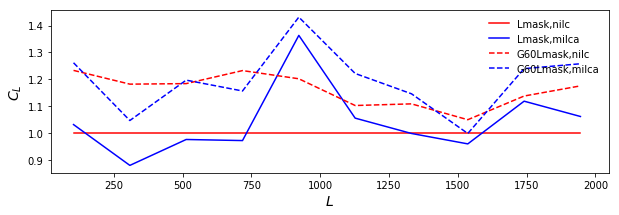

In [12]:
vcb, scb = errors('none','nilc',0,mb,'dr2_smica','Lmask')
pl.plot_1dstyle()
for dtype in ['dr2_smica']:
    for cmask, ls in [('Lmask','-'),('G60Lmask','--')]:
        for ytype, co in [('nilc','r'),('milca','b')]:
            vcb2, __ = errors('none',ytype,0,mb,dtype,cmask)
            plot(mb.bc,vcb2/vcb,ls=ls,color=co,label=cmask+','+ytype)
legend()

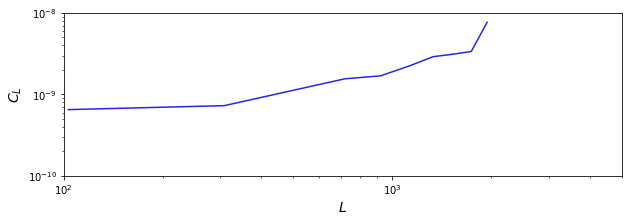

In [13]:
pl.plot_1dstyle(xlog=True,xmin=100,xmax=5000,ylog=True,ymin=1e-10,ymax=1e-8)
s = mb.bc**2/2/np.pi
plot(mb.bc,s*vcb)

In [14]:
cov = np.cov(scb[1:,:],rowvar=0)
dcov = np.diag(1./np.sqrt(np.diag(cov)))
corr = np.matmul(np.matmul(dcov,cov),dcov)
print(corr)

[[ 1.         -0.14922259 -0.20771839  0.03387697 -0.09017616  0.0518146
  -0.05072637 -0.06015284 -0.01751317 -0.06504342]
 [-0.14922259  1.          0.14542686 -0.02242834 -0.00581433 -0.02861202
   0.01876035  0.05981982 -0.01317755  0.16542996]
 [-0.20771839  0.14542686  1.          0.1179025   0.12782441 -0.07264376
   0.27740389  0.07722046  0.05299141 -0.01544842]
 [ 0.03387697 -0.02242834  0.1179025   1.          0.10534715 -0.09461911
   0.05341881  0.00408774 -0.02168013 -0.07640982]
 [-0.09017616 -0.00581433  0.12782441  0.10534715  1.          0.04117394
   0.0532208   0.0224522   0.16338425  0.16499909]
 [ 0.0518146  -0.02861202 -0.07264376 -0.09461911  0.04117394  1.
  -0.10451928 -0.02512797 -0.03206018  0.03060955]
 [-0.05072637  0.01876035  0.27740389  0.05341881  0.0532208  -0.10451928
   1.          0.07223815  0.04470139  0.02595915]
 [-0.06015284  0.05981982  0.07722046  0.00408774  0.0224522  -0.02512797
   0.07223815  1.          0.00408478 -0.00400592]
 [-0.0175

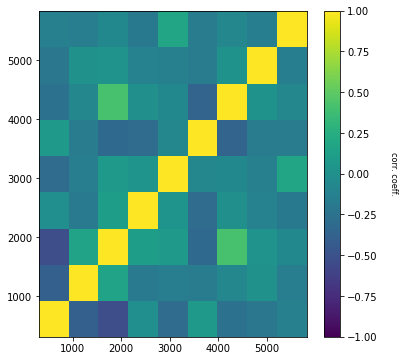

In [22]:
pl.plot_corr(corr,mb.bc[:10]*3)